In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


# Scope of the project # 

On this EDA I'm going to explore aspects of this dataset, checking if there's any correlation between GDP X Life Expectancy

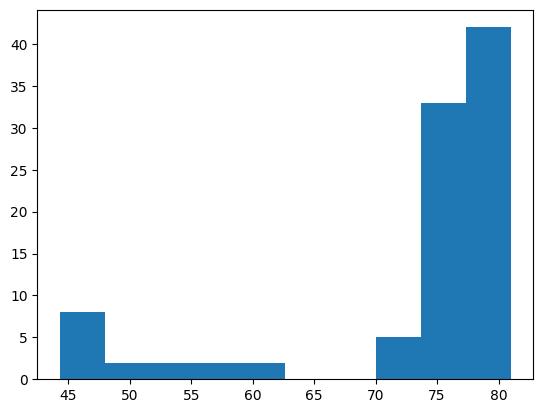

In [4]:
plt.hist(df['Life expectancy at birth (years)'])
plt.show()

# Comparing the whole #

In the next graph its possible to see The life Expectancy for each year, divide by country, and the size of the dot is the GDP per country/year.

And as far as its possible to see in this graph:
- Zimbabwe had a big improvement in life expectancy, but not that much in GDP (we're going to see in the next anaylisis, this is not 100% true)
- GDP means something, but not everything, its possible to see some country with higher expectancy, but not that much GDP compared to others

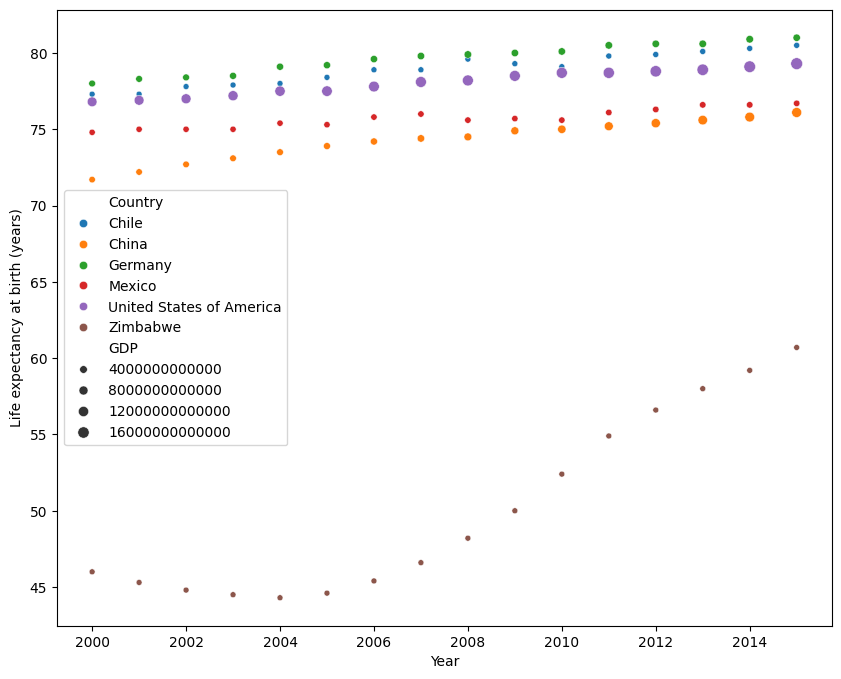

In [5]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Year', y='Life expectancy at birth (years)', data=df, hue='Country', size='GDP')
plt.show()

# Comparing GPD's #

Comparing GPD between this country is kind of a problem, due to different magnitudes, there's almost no big increase from 2000-2015 in country that are not China/USA.

So the correct approach to these kind of analysis, is comparing the country with itself past, thats what we're going to do in the next steps.

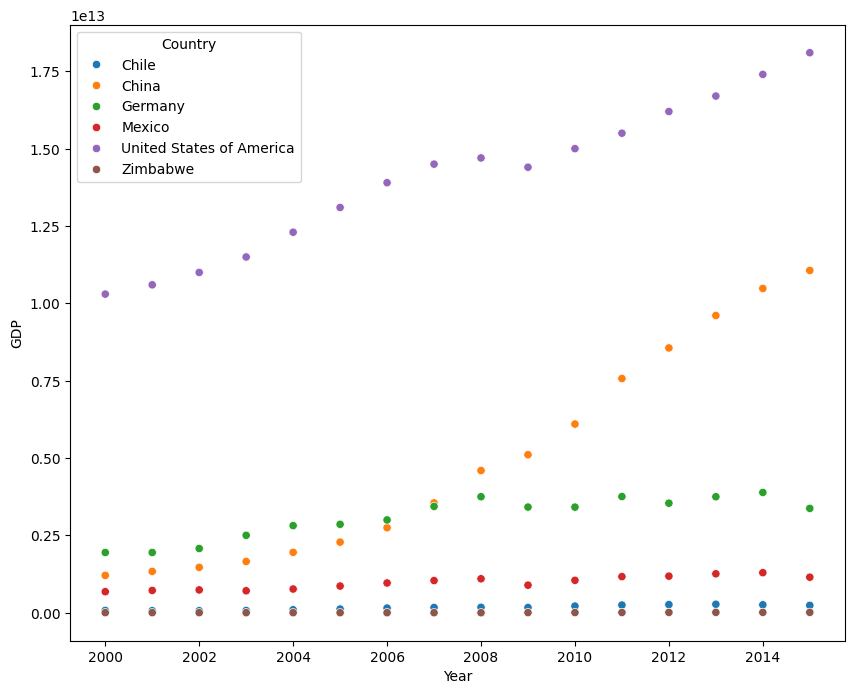

In [6]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Year', y='GDP', data=df, hue='Country')
plt.show()

Another visualization of almost the same graph above, dashed lines (y) are to GDP, and straight lines (y2) are to life expectancy.

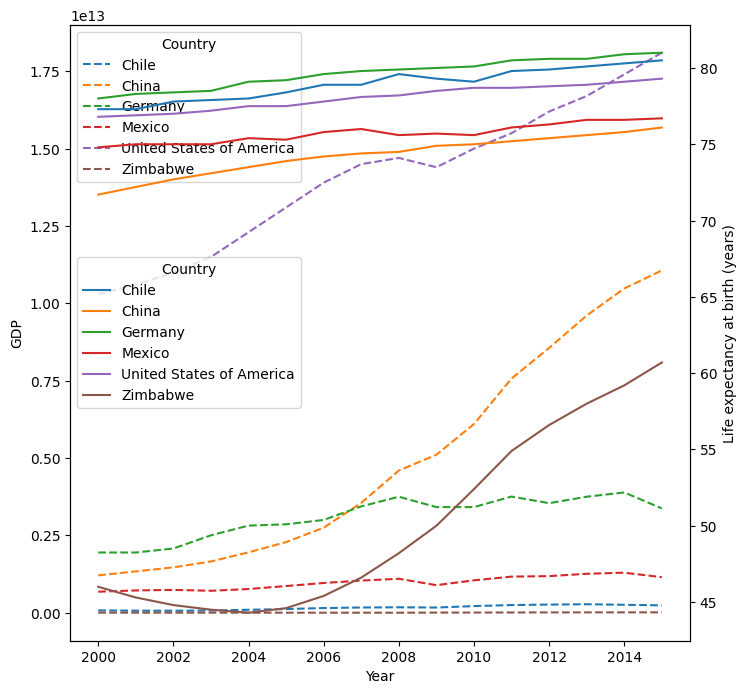

In [7]:
plt.figure(figsize=(8,8))
ax = sns.lineplot(x='Year', y='GDP', data=df, hue='Country', linestyle='--')
ax2 = plt.twinx()

sns.lineplot(x='Year', y='Life expectancy at birth (years)', data=df, hue='Country', ax=ax2)
plt.show()

# Final conclusions #

Below we have 6 subplots, one plot per country, and its really visible the correlation between the GDP and life expectancy.

The difference in magnitude made it pretty hard to see any difference comparing all the countries at the same time, in the country's that have a smaller GDP, if we have a look to the GDP of Zimbabwe for example in the above graphs, its almost a straight line, but when we have a look only into the specific country, its possible to see that its more than 2x bigger in 2015 than it was in 2000. 

So yes, there's a correlation between GDP and Life Expectancy.

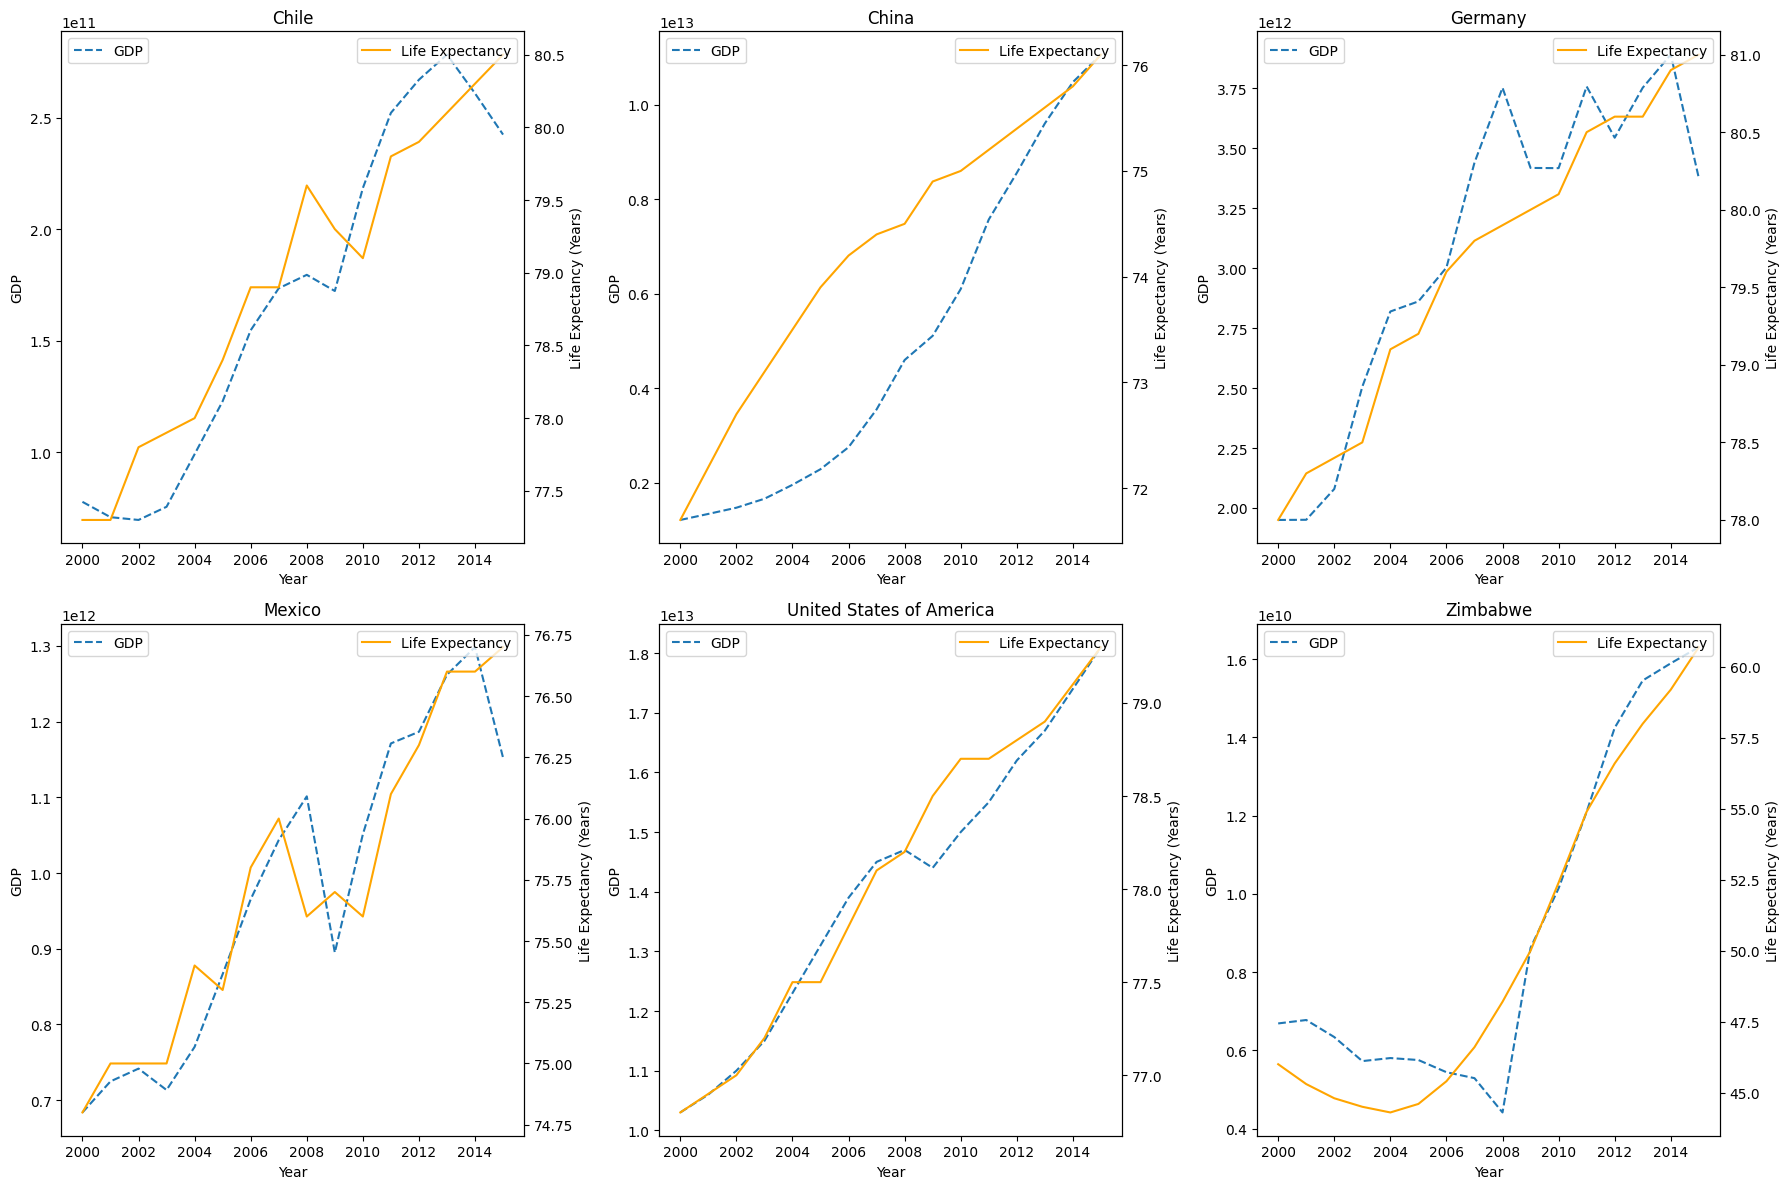

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of unique countries in the dataset
countries = df['Country'].unique()

# Create a grid of subplots (2 rows, 3 columns for 6 countries)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop over the countries and plot GDP and Life Expectancy on separate axes for each subplot
for i, country in enumerate(countries):
    ax = axs[i]
    
    # Filter data for the current country
    country_data = df[df['Country'] == country]
    
    # Plot GDP on the primary y-axis
    sns.lineplot(x='Year', y='GDP', data=country_data, ax=ax, linestyle='--', label='GDP')
    
    # Create a twin y-axis for Life Expectancy
    ax2 = ax.twinx()
    sns.lineplot(x='Year', y='Life expectancy at birth (years)', data=country_data, ax=ax2, label='Life Expectancy', color='orange')

    # Set titles and labels
    ax.set_title(country)
    ax.set_ylabel('GDP')
    ax2.set_ylabel('Life Expectancy (Years)')
    
    # Adjust the legend
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# calculate r correlation coefficient
r = df.corr()
r

C:\Users\Shauan\AppData\Local\Temp\ipykernel_1260\728239671.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r = df.corr()


,Year,Life expectancy at birth (years),GDP
Year,1.000000,0.155050,0.208288
Life expectancy at birth (years),0.155050,1.000000,0.343207
GDP,0.208288,0.343207,1.000000
